In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import graphviz
from sklearn.decomposition import PCA

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz\\bin\\'

In [3]:
path_features = 'C:\\Belgium test Project\\New Dataset\\features_py\\features.csv'
path_features2 = 'C:\\Belgium test Project\\New Dataset2\\Features\\features.csv'

path_label = 'C:\\Belgium test Project\\New Dataset\\Label\\label.csv'
path_label2 = 'C:\\Belgium test Project\\New Dataset2\\Label\\label.csv'

In [4]:
features = pd.read_csv(path_features)
features2 = pd.read_csv(path_features2)

lab = pd.read_csv(path_label)
lab2 = pd.read_csv(path_label2)

In [5]:
Lab_1 = lab['Label'].to_numpy()
Lab_1_norm = len(Lab_1[Lab_1 == 0])
Lab_1_mito = len(Lab_1[Lab_1 == 1])
Lab_1_amount = pd.DataFrame({'Amount':[Lab_1_norm,Lab_1_mito],'Class' : ['Noise','Mitosis']})

Lab_2 = lab2['Label'].to_numpy()
Lab_2_norm = len(Lab_2[Lab_2 == 0])
Lab_2_mito = len(Lab_2[Lab_2 == 1])
Lab_2_amount = pd.DataFrame({'Amount':[Lab_2_norm,Lab_2_mito],'Class' : ['Noise','Mitosis']})


Text(0.5, 1.0, 'The path process by Python set 2 programming')

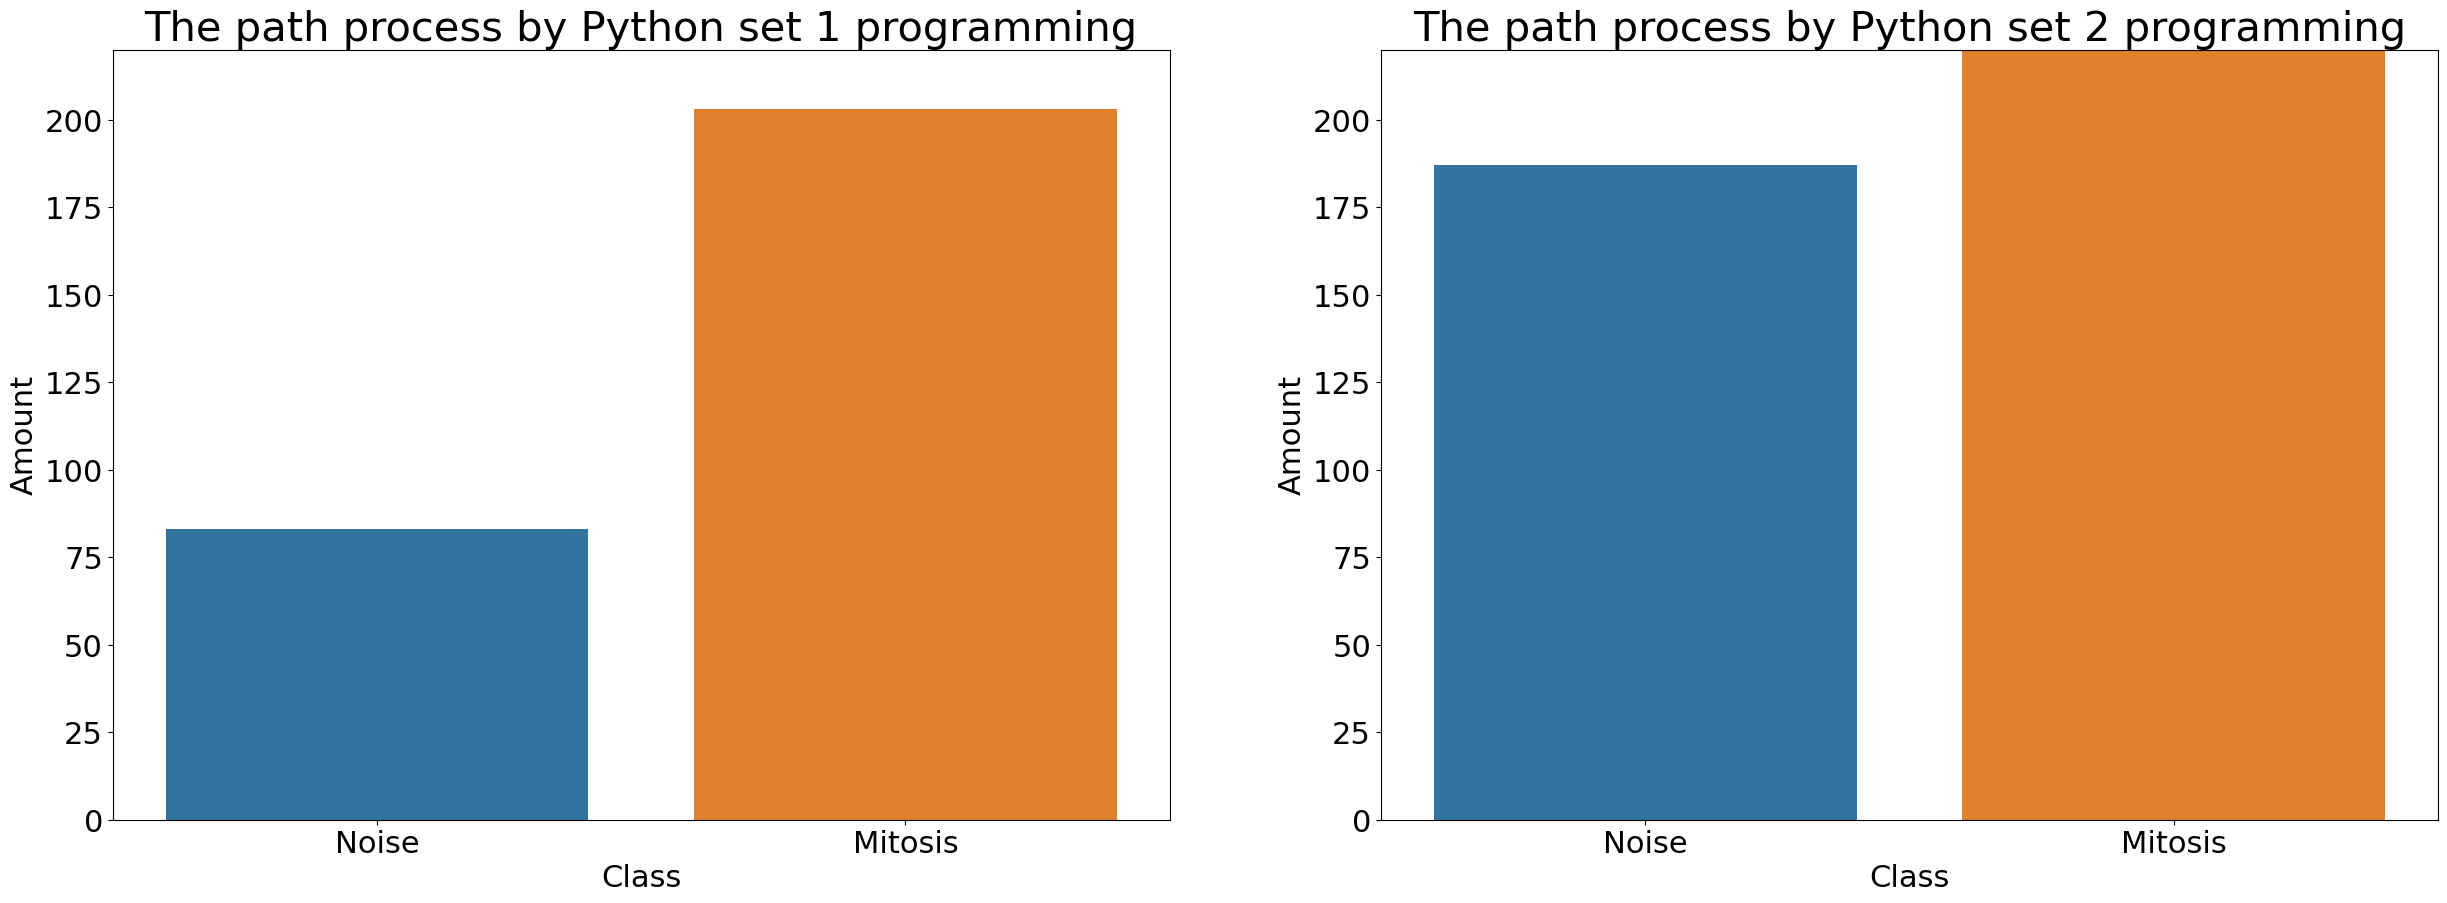

In [6]:
plt.figure(figsize = (30,10))
plt.rcParams.update({'font.size': 22})
plt.subplot(1,2,1)
ax = sns.barplot(x = 'Class', y = 'Amount', data = Lab_1_amount)
ax.set(ylim=(0,220))
plt.title('The path process by Python set 1 programming',fontsize = 30)
plt.subplot(1,2,2)
ax = sns.barplot(x = 'Class', y = 'Amount', data = Lab_2_amount)
ax.set(ylim=(0,220))
plt.title('The path process by Python set 2 programming',fontsize = 30)

In [7]:
print('Dataset 1 included ' + str(Lab_1_norm) + ' noise and ' + str(Lab_1_mito) + ' mitosis')

Dataset 1 included 83 noise and 203 mitosis


In [8]:
print('Dataset 2 included ' + str(Lab_2_norm) + ' noise and ' + str(Lab_2_mito) + ' mitosis')

Dataset 2 included 187 noise and 229 mitosis


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 82 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Closed Euclidean distance from neighbor  286 non-null    float64
 1   Area of mother cell                      286 non-null    float64
 2   Major axis of mother cell                286 non-null    float64
 3   Minor axis of mother cell                286 non-null    float64
 4   Circularity of mother cell               286 non-null    float64
 5   Mean intensity of mother cell            286 non-null    float64
 6   Max intensity of mother cell             286 non-null    float64
 7   Min intensity of mother cell             286 non-null    float64
 8   Area of daughter cell                    286 non-null    float64
 9   Major axis of daughter cell              286 non-null    float64
 10  Minor axis of daughter cell              286 non-n

In [10]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 82 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Closed Euclidean distance from neighbor  416 non-null    float64
 1   Area of mother cell                      416 non-null    float64
 2   Major axis of mother cell                416 non-null    float64
 3   Minor axis of mother cell                416 non-null    float64
 4   Circularity of mother cell               416 non-null    float64
 5   Mean intensity of mother cell            416 non-null    float64
 6   Max intensity of mother cell             416 non-null    float64
 7   Min intensity of mother cell             416 non-null    float64
 8   Area of daughter cell                    416 non-null    float64
 9   Major axis of daughter cell              416 non-null    float64
 10  Minor axis of daughter cell              416 non-n

In [11]:
features_all = pd.concat([features,features2],ignore_index = True)

In [12]:
features_all

,Closed Euclidean distance from neighbor,Area of mother cell,Major axis of mother cell,Minor axis of mother cell,Circularity of mother cell,Mean intensity of mother cell,Max intensity of mother cell,Min intensity of mother cell,Area of daughter cell,Major axis of daughter cell,...,Range of mean intensity,Range of max intensity,SD of circularity,SD of major axis,SD of minor axis,SD of area,SD of extent,SD of mean intensity,SD of max intensity,Path length
0,16.934932,370.0,30.573303,17.446161,0.821205,0.631684,0.715977,0.509469,340.0,30.409743,...,0.021086,0.052164,0.031774,4.246580,7.042713,125.017332,0.070628,0.007653,0.017504,7.0
1,201.000366,164.0,16.179601,13.071344,0.589333,0.464779,0.969641,0.058556,351.0,36.306030,...,0.295035,0.259703,0.251416,3.835988,8.085493,94.947891,0.103951,0.100941,0.080201,8.0
2,169.941620,52.0,11.899966,6.381393,0.844057,0.659130,0.697320,0.578253,39.0,8.957993,...,0.204715,0.257179,0.062969,0.380537,2.279773,16.740370,0.093761,0.077511,0.102312,6.0
3,29.015380,165.0,15.882478,13.599839,0.516513,0.358550,0.784883,0.007546,177.0,18.754806,...,0.258602,0.087197,0.129480,1.715983,1.356731,21.840330,0.050323,0.106788,0.037287,5.0
4,12.726937,285.0,23.616924,15.520008,0.753754,0.396535,1.066062,0.033636,141.0,16.862084,...,0.466485,0.372012,0.037553,2.437141,3.369299,81.404177,0.086835,0.129261,0.138378,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,19.521709,100.0,17.805931,8.126896,0.889767,0.515326,0.702223,0.034470,111.0,23.834496,...,0.033699,0.050782,0.021521,0.239337,2.779277,12.871966,0.065072,0.013435,0.020990,5.0
698,83.183497,42.0,15.170033,4.147155,0.961907,0.583552,0.688726,0.355849,37.0,14.228488,...,0.087536,0.056865,0.105918,0.375975,3.310676,8.287792,0.021948,0.036459,0.021583,5.0
699,24.799785,19.0,7.185497,3.491612,0.874001,0.525228,0.699159,0.211614,22.0,7.183437,...,0.023883,0.021014,0.030137,0.332564,0.033628,1.247219,0.043773,0.010129,0.008604,4.0
700,17.601015,75.0,17.443879,7.295063,0.908354,0.555051,0.958149,0.251610,73.0,16.739917,...,0.016295,0.050573,0.036825,0.107089,9.274719,24.055491,0.025860,0.006742,0.021785,4.0


In [13]:
label_all = pd.concat([lab,lab2],ignore_index = True)

In [14]:
label_all

,Label,Class
0,0,Noise
1,1,Mitosis
2,0,Noise
3,0,Noise
4,1,Mitosis
...,...,...
697,0,Noise
698,0,Noise
699,0,Noise
700,0,Noise


In [15]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [16]:
Tree = tree.DecisionTreeClassifier(max_depth = 3)
Tree_py = Tree.fit(features_all,label_all['Label'])

In [34]:
dot_data = tree.export_graphviz(Tree_py, out_file=None, 
                      feature_names=features_all.columns,
                      class_names=label_all['Class'].unique(),
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_py = graphviz.Source(dot_data)
plt.figure(figsize = (40,40))
graph_py
graph_py.format = 'png'
graph_py.render('C:\\Belgium test Project\\Results\\LFI_features_structure')

'C:\\Belgium test Project\\Results\\LFI_features_structure.png'

<Figure size 4000x4000 with 0 Axes>

In [18]:
input_all = pd.concat([features_all,label_all],axis = 1)

In [19]:
input_all

,Closed Euclidean distance from neighbor,Area of mother cell,Major axis of mother cell,Minor axis of mother cell,Circularity of mother cell,Mean intensity of mother cell,Max intensity of mother cell,Min intensity of mother cell,Area of daughter cell,Major axis of daughter cell,...,SD of circularity,SD of major axis,SD of minor axis,SD of area,SD of extent,SD of mean intensity,SD of max intensity,Path length,Label,Class
0,16.934932,370.0,30.573303,17.446161,0.821205,0.631684,0.715977,0.509469,340.0,30.409743,...,0.031774,4.246580,7.042713,125.017332,0.070628,0.007653,0.017504,7.0,0,Noise
1,201.000366,164.0,16.179601,13.071344,0.589333,0.464779,0.969641,0.058556,351.0,36.306030,...,0.251416,3.835988,8.085493,94.947891,0.103951,0.100941,0.080201,8.0,1,Mitosis
2,169.941620,52.0,11.899966,6.381393,0.844057,0.659130,0.697320,0.578253,39.0,8.957993,...,0.062969,0.380537,2.279773,16.740370,0.093761,0.077511,0.102312,6.0,0,Noise
3,29.015380,165.0,15.882478,13.599839,0.516513,0.358550,0.784883,0.007546,177.0,18.754806,...,0.129480,1.715983,1.356731,21.840330,0.050323,0.106788,0.037287,5.0,0,Noise
4,12.726937,285.0,23.616924,15.520008,0.753754,0.396535,1.066062,0.033636,141.0,16.862084,...,0.037553,2.437141,3.369299,81.404177,0.086835,0.129261,0.138378,11.0,1,Mitosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,19.521709,100.0,17.805931,8.126896,0.889767,0.515326,0.702223,0.034470,111.0,23.834496,...,0.021521,0.239337,2.779277,12.871966,0.065072,0.013435,0.020990,5.0,0,Noise
698,83.183497,42.0,15.170033,4.147155,0.961907,0.583552,0.688726,0.355849,37.0,14.228488,...,0.105918,0.375975,3.310676,8.287792,0.021948,0.036459,0.021583,5.0,0,Noise
699,24.799785,19.0,7.185497,3.491612,0.874001,0.525228,0.699159,0.211614,22.0,7.183437,...,0.030137,0.332564,0.033628,1.247219,0.043773,0.010129,0.008604,4.0,0,Noise
700,17.601015,75.0,17.443879,7.295063,0.908354,0.555051,0.958149,0.251610,73.0,16.739917,...,0.036825,0.107089,9.274719,24.055491,0.025860,0.006742,0.021785,4.0,0,Noise


<AxesSubplot:xlabel='SD of mean intensity', ylabel='Min intensity of mother cell'>

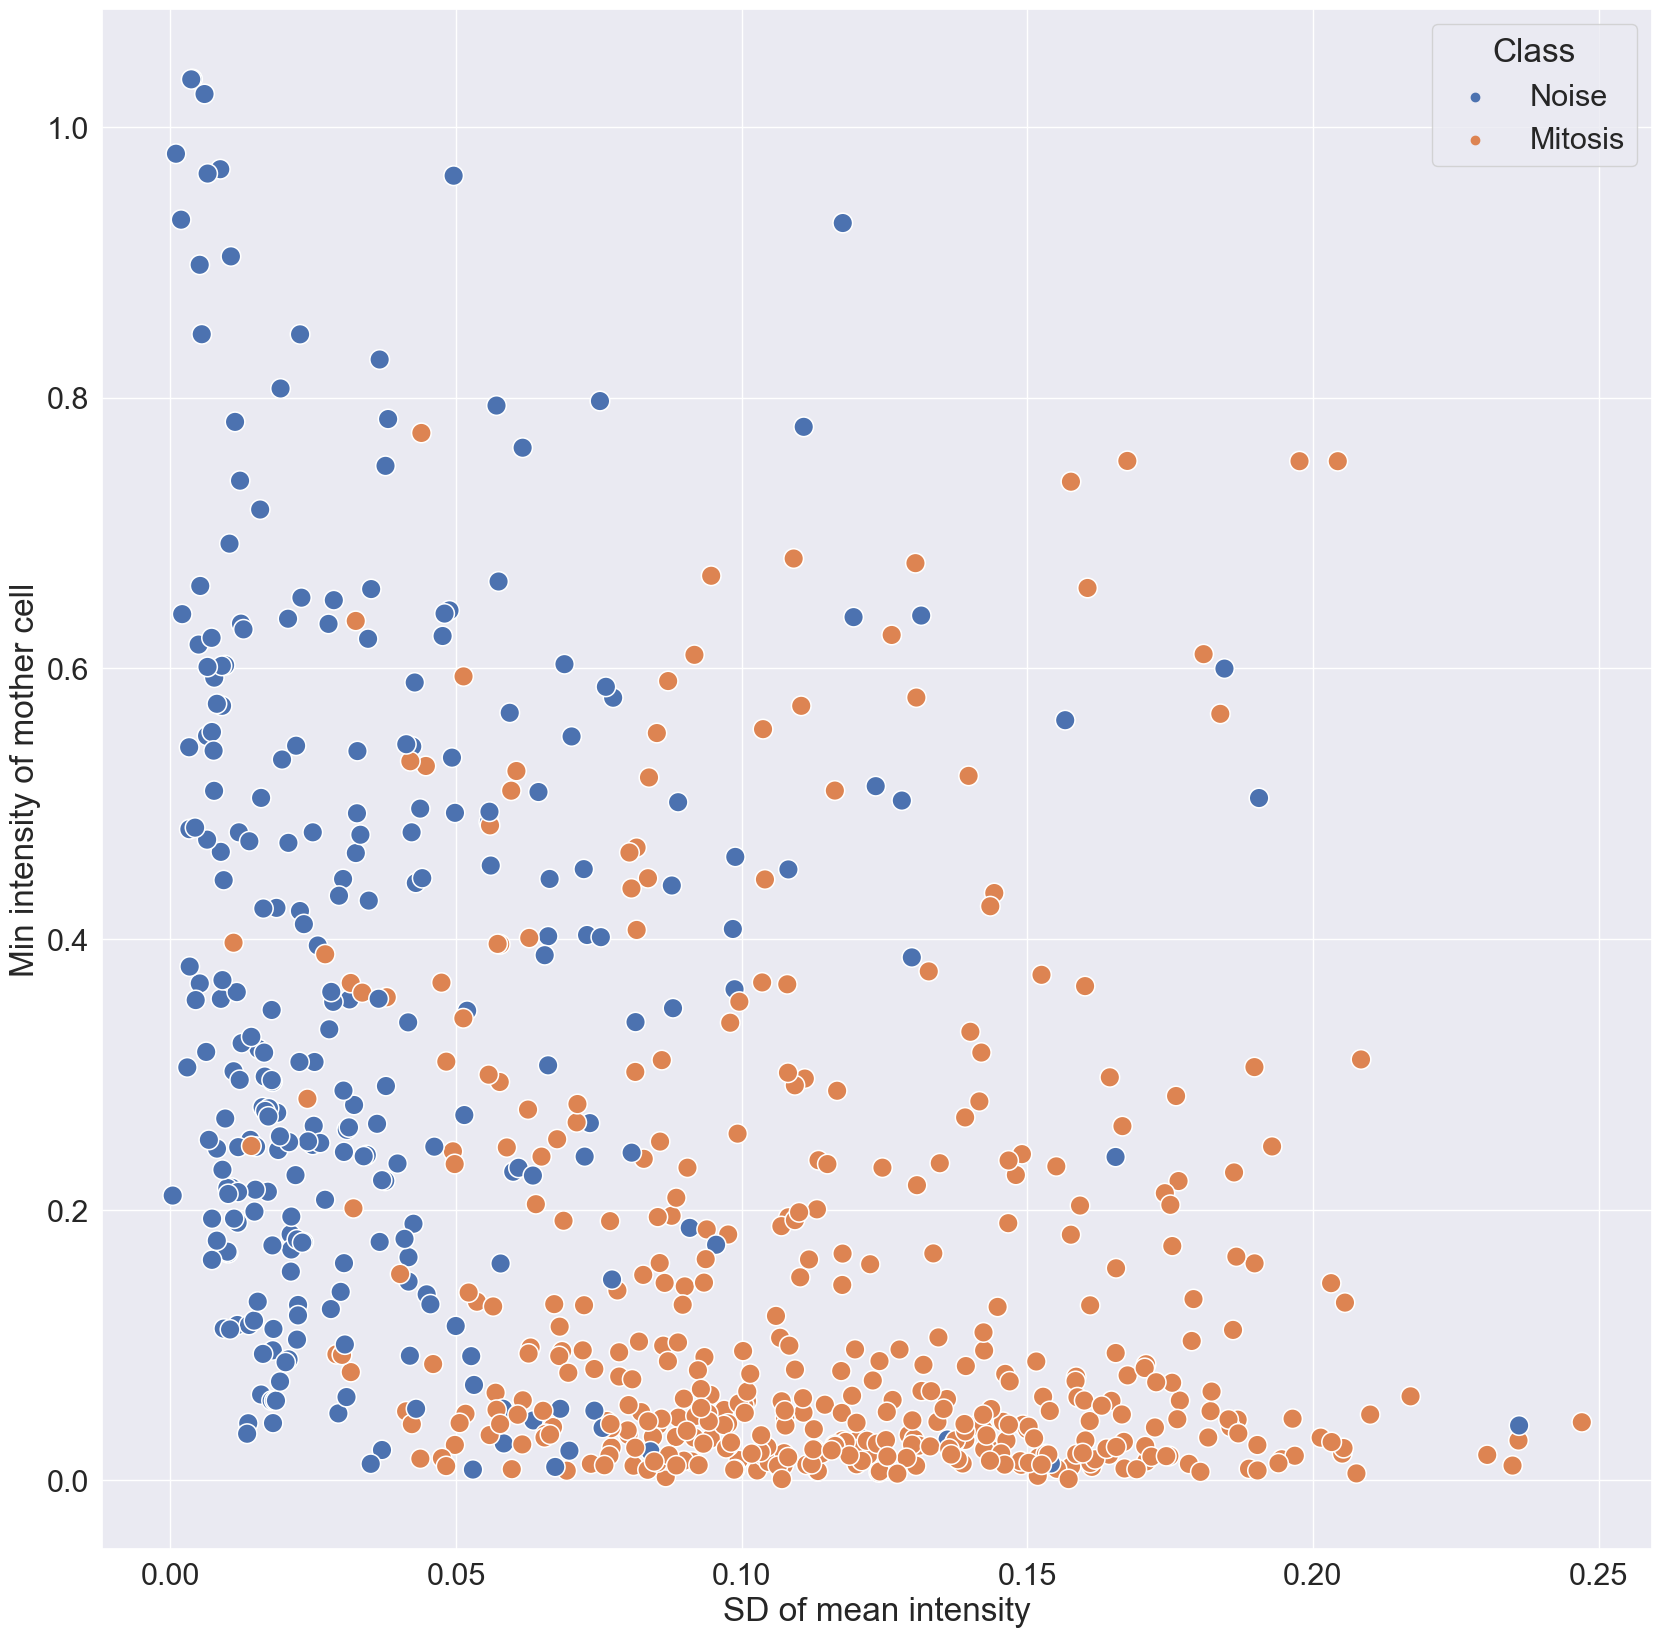

In [20]:
plt.figure(figsize = (20,20))
sns.set(font_scale=2)
sns.scatterplot(data = input_all, x = 'SD of mean intensity', 
                y = 'Min intensity of mother cell', hue = 'Class', s = 200)

In [22]:
pd_for_pp = input_all[['Mean intensity of mother cell','Area of mother cell','Mean intensity diff','Class']]
pd_for_pp = pd_for_pp.rename(columns = {'Mean intensity of mother cell':'MIM','Area of mother cell':'AMC','Mean intensity diff'
                                       :'MID'})

<Figure size 3000x3000 with 0 Axes>

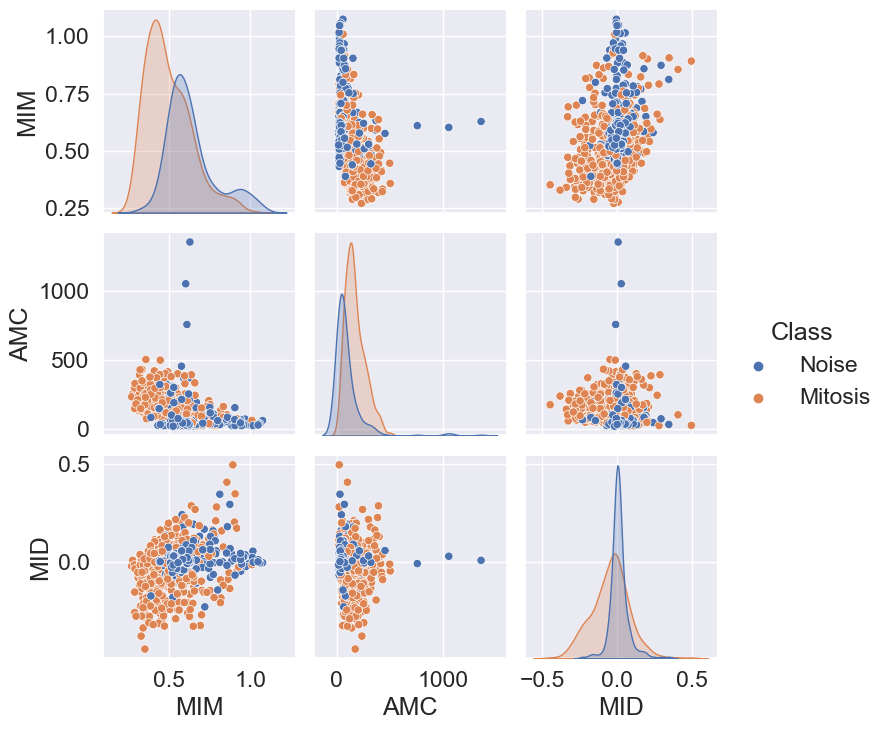

In [23]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.pairplot(pd_for_pp, hue = 'Class')

In [30]:
pd_for_cont_f = input_all[['Mean intensity of mother cell','Mean intensity diff','Range of circularity','Range of major axis','Class']]
pd_for_cont_f = pd_for_cont_f.rename(columns = {'Mean intensity of mother cell':'MIM','Mean intensity diff':'MID','Range of circularity':'RC','Range of major axis'
                                       :'RMA'})

<Figure size 3000x3000 with 0 Axes>

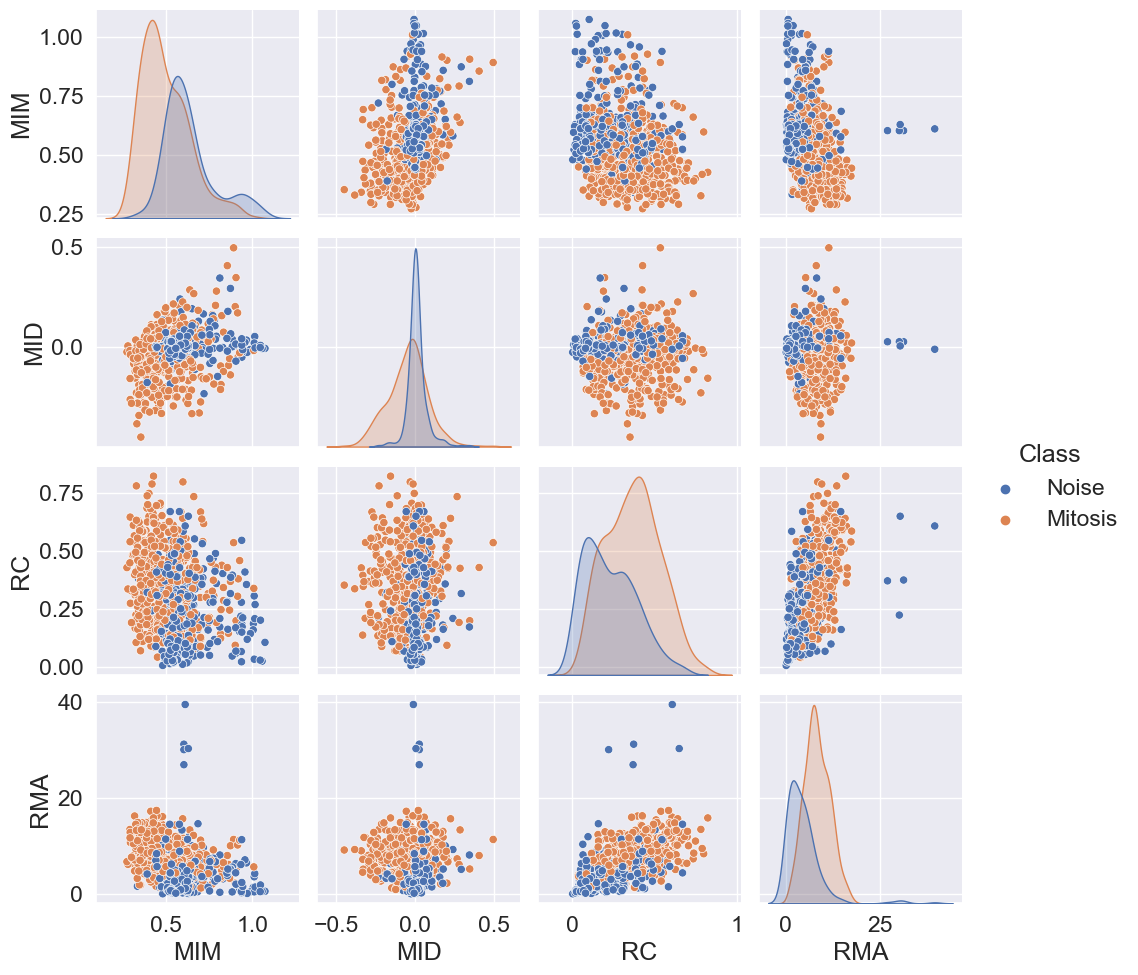

In [31]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.pairplot(pd_for_cont_f, hue = 'Class')